<a href="https://colab.research.google.com/github/Masoud0389/Steady_State/blob/main/rbf_v2_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#pip install git+https://github.com/Kaggle/learntools.git

In [86]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system

from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex6 import *

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
import numpy as np
warnings.filterwarnings('ignore')
data = pd.read_csv('DATASET4.csv')
#data.info()

In [88]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,load,weakdays,season,label
0,1,0.99833,0.99060,0.98686,0.98324,0.97566,0.97532,0.97288,0.97113,0.96968,...,0.96911,0.96603,0.96455,0.96497,0.96438,0.96419,0.67977,1,1,0
1,1,0.99834,0.99069,0.98699,0.98341,0.97592,0.97560,0.97319,0.97147,0.97005,...,0.96946,0.96642,0.96496,0.96540,0.96481,0.96463,0.67443,1,1,0
2,1,0.99834,0.99068,0.98699,0.98340,0.97591,0.97559,0.97318,0.97146,0.97004,...,0.96944,0.96641,0.96495,0.96539,0.96480,0.96462,0.67463,1,1,0
3,1,0.99833,0.99059,0.98685,0.98322,0.97563,0.97528,0.97285,0.97109,0.96964,...,0.96907,0.96598,0.96451,0.96492,0.96433,0.96414,0.68036,1,1,0
4,1,0.99829,0.99039,0.98657,0.98286,0.97506,0.97468,0.97219,0.97036,0.96885,...,0.96833,0.96515,0.96363,0.96400,0.96340,0.96321,0.69162,1,1,0


In [89]:
#data.isna().sum()

In [90]:
#data.season.value_counts()/96

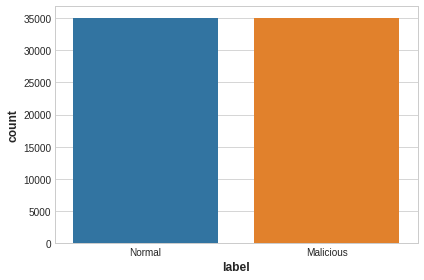

In [91]:
g = sns.countplot(data['label'])
g.set_xticklabels(['Normal','Malicious'])
plt.show()

In [92]:
y = data.label
list = ['label']
X = data.drop(list,axis = 1 )
print(type(X))
X = StandardScaler().fit_transform(X)
X = normalize(X, norm="max")
X = pd.DataFrame(X)

<class 'pandas.core.frame.DataFrame'>


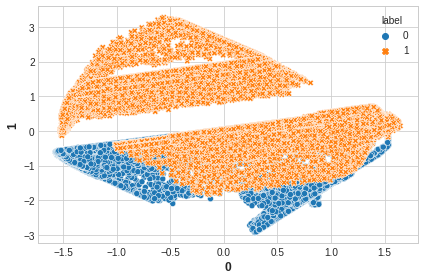

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, whiten= True)
X_fr = pca.fit_transform(X)
X_fr = pd.DataFrame(X_fr)
X_fr = pd.concat([X_fr, y], axis=1)
X_fr.head()
sns.scatterplot(data=X_fr, x=X_fr[0], y=X_fr[1],  hue="label", style="label")

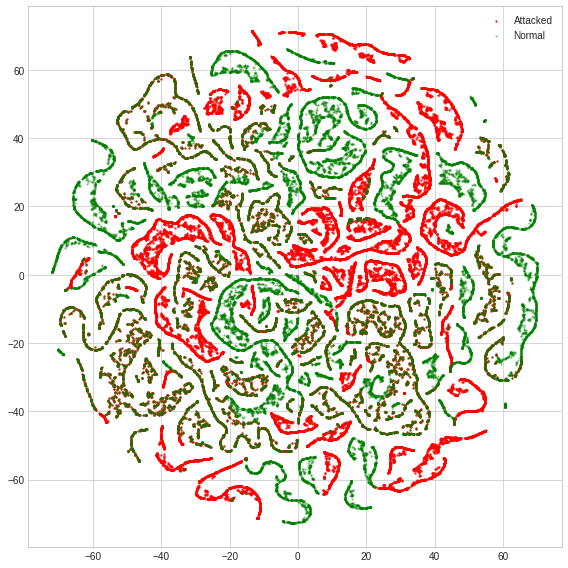

In [123]:
# splitting by class
attack = data[data.label == 1]
clean = data[data.label == 0]

# undersample clean transactions
normal = clean.sample(
    int(len(attack) * 1),
    random_state=42
)

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([attack, normal])
#column_names = list[visualisation_initial.drop('label', axis=1).columns\

# isolate features from labels 
features, labels = visualisation_initial.drop('label', axis=1).values, \
                   visualisation_initial.label.values

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=42).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Attacked'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Normal'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.show;
#tsne_scatter(features, labels, dimensions=2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

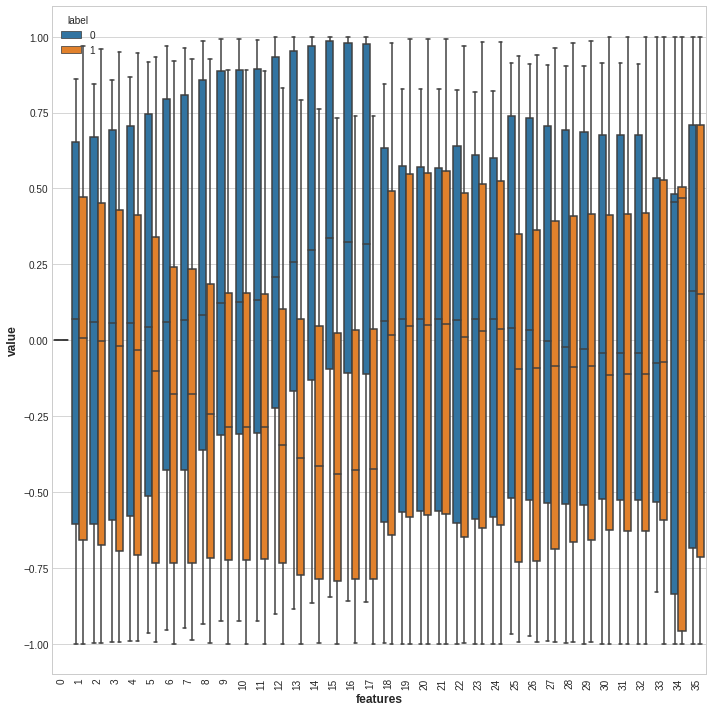

In [94]:
data1 = pd.concat([y, X],axis=1)
data1 = pd.melt(data1,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="label", data=data1)
plt.xticks(rotation=90)

In [95]:
#sns.swarmplot(x="features", y="value", hue="label", data=data1)

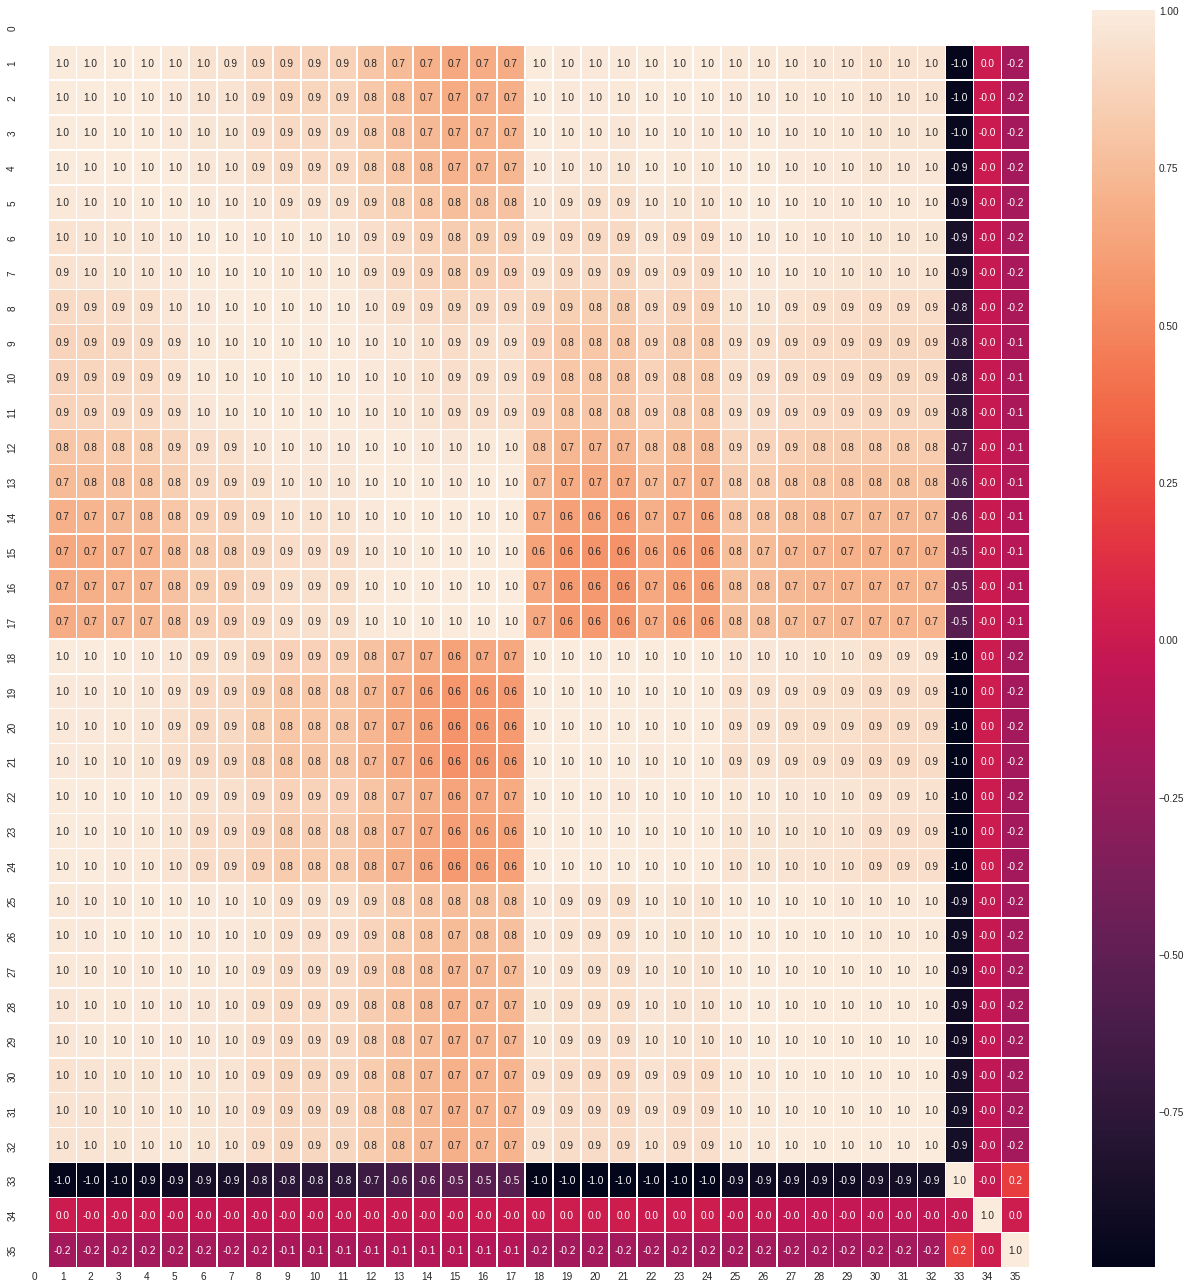

In [96]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [97]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

# correlation(X, 0.9)
# print(X.shape)
# X.head(5)

In [98]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.7)
input_shape = [X_train.shape[1]]

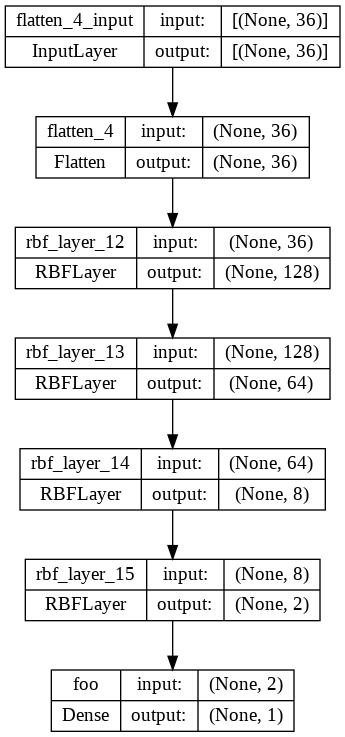

In [124]:
from tensorflow import keras
from keras.layers import Layer, Dense, Flatten
from keras import backend as K
from keras import layers, utils
from keras.models import Sequential
from keras.losses import binary_crossentropy


class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)
model = Sequential()
model.add(Flatten(input_shape=(36,)))
model.add(RBFLayer(128, 0.1))
model.add(RBFLayer(64, 0.05))
model.add(RBFLayer(8, 0.05))
model.add(RBFLayer(2, 0.05))
model.add(Dense(1, activation='sigmoid', name='foo'))
utils.plot_model(model, show_shapes=True)

In [125]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [126]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [127]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
96/96 [==============================] - 3s 19ms/step - loss: 0.9078 - binary_accuracy: 0.5000 - val_loss: 0.8467 - val_binary_accuracy: 0.5000
Epoch 2/200
96/96 [==============================] - 2s 16ms/step - loss: 0.8056 - binary_accuracy: 0.5000 - val_loss: 0.7678 - val_binary_accuracy: 0.5000
Epoch 3/200
96/96 [==============================] - 2s 16ms/step - loss: 0.7419 - binary_accuracy: 0.5000 - val_loss: 0.7227 - val_binary_accuracy: 0.5000
Epoch 4/200
96/96 [==============================] - 2s 16ms/step - loss: 0.7129 - binary_accuracy: 0.5000 - val_loss: 0.7052 - val_binary_accuracy: 0.5000
Epoch 5/200
96/96 [==============================] - 2s 16ms/step - loss: 0.7003 - binary_accuracy: 0.5000 - val_loss: 0.6960 - val_binary_accuracy: 0.5000
Epoch 6/200
96/96 [==============================] - 2s 16ms/step - loss: 0.6934 - binary_accuracy: 0.5000 - val_loss: 0.6908 - val_binary_accuracy: 0.5000
Epoch 7/200
96/96 [==============================] - 2s 16ms/ste

657/657 [==============================] - 1s 2ms/step


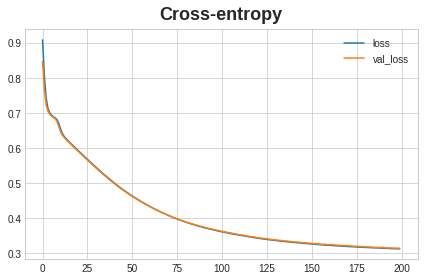

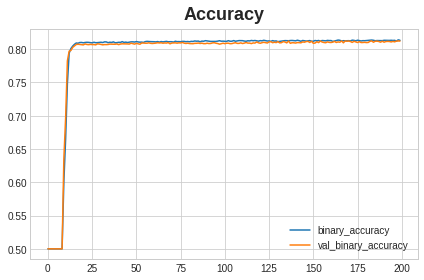

In [128]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
y_pred = model.predict(X_valid).round()

In [104]:
#pip install tensorflow-addons

In [105]:
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0).fit(X_train, y_train).predict(X_valid)

     
# def classifier(k):
#   from sklearn.neighbors import KNeighborsClassifier
#   classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
#   y_pred = classifier.fit(X_train, y_train).predict(X_valid)
#   return y_pred

# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0).fit(X_train, y_train).predict(X_valid)
     

#from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0)


#from sklearn.cluster import DBSCAN
#Numpy array of all the cluster labels assigned to each data point
#label = DBSCAN(eps = 0.001, min_samples = 10, algorithm='ball_tree', metric='haversine').fit_predict(X_principal)
#label = db_default.labels_
#labels.to_csv('test_DBSCAN1.csv')
     

#from sklearn.ensemble import IsolationForest
#label = IsolationForest(n_estimators= 500, contamination=3/60).fit_predict(X_principal)
     

#from sklearn.cluster import OPTICS
#label = OPTICS(min_samples= 500).fit_predict(X_principal)
     

#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=500)
#label = lof.fit_predict(X_principal)
     

#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X_principal)
#y_pred = classifier(193)

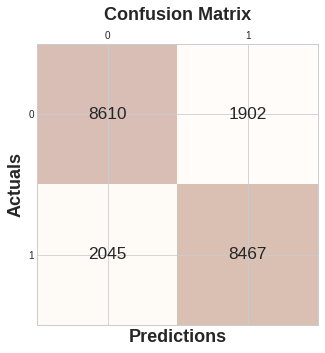

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [130]:
print(f"f1_score is:{f1_score(y_valid, y_pred, average='binary')}\n accuracy_score is: {accuracy_score(y_valid, y_pred)}\n precision is: {precision_score(y_valid, y_pred)}\n recal is: {recall_score(y_valid, y_pred)}") 

f1_score is:0.8109764858004884
 accuracy_score is: 0.8122621765601218
 precision is: 0.8165686179959495
 recal is: 0.8054604261796042


In [ ]:
# f1_list = []
# for k in range(2, 200):
#   y_pred = classifier(k)
#   f1 = f1_score(y_valid, y_pred, average='binary')
#   f1_list.append(f1)
# plt.plot(f1_list)